# Question 01

In [6]:
#step 1
import pandas as pd

In [7]:
#step 2, 3
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep="|")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
#step 4
#mean age per occupation
users[["occupation","age"]].groupby("occupation").mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [9]:
#step 5
# Discover the Male ratio per occupation and sort it from the most to the least 
Male_ratio = (users[users.gender=='M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count()).sort_values(ascending=False)
Male_ratio

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

In [10]:
#step 6
#  For each occupation, calculate the minimum and maximum ages
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [11]:
#step 7
#  For each combination of occupation and sex, calculate the mean age 
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [19]:
#step 8
# For each occupation present the percentage of women and men
# Group the data by occupation and gender
occ_W_M = users.groupby('occupation')['gender'].value_counts(normalize=True).mul(100).unstack().reset_index().rename_axis(columns=None)
occ_W_M.columns = ['occupation', 'Percentage_F', 'Percentage_M']
occ_W_M

,occupation,Percentage_F,Percentage_M
0,administrator,45.569620,54.430380
1,artist,46.428571,53.571429
2,doctor,NaN,100.000000
3,educator,27.368421,72.631579
4,engineer,2.985075,97.014925
5,entertainment,11.111111,88.888889
6,executive,9.375000,90.625000
7,healthcare,68.750000,31.250000
8,homemaker,85.714286,14.285714
9,lawyer,16.666667,83.333333


# Question 2

step 1,2,3

In [9]:
import pandas as pd
euro12=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


step 4 - Select only the Goal column

In [23]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2



step 5 - How many teams participated in the Euro2012?

In [34]:
teams = euro12['Team'].count()
print("Number of teams participated in Euro2012:", teams)

Number of teams participated in Euro2012: 16


step 6 - What is the number of columns in the dataset?

In [25]:
cols = euro12.shape[1]
print("Number of columns in the dataset:", cols)

Number of columns in the dataset: 35


step 7 -View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [26]:
discipline= euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


step 8 - Sort the teams by Red Cards, then to Yellow Cards

In [35]:
disc_sort = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=True)
disc_sort

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


step 9 - Calculate the mean Yellow Cards given per Team

In [37]:
discipline.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

step 10- Filter teams that scored more than 6 goals

In [29]:
goals = euro12[euro12['Goals'] > 6]
goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


step 11- Select the teams that start with G

In [30]:
team_g=euro12[euro12['Team'].str.startswith('G')]
team_g

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


step 12-Select the first 7 columns

In [31]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


step 13- Select all columns except the last 3

In [32]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


step 14 - Present only the Shooting Accuracy from England, Italy and Russia

In [40]:
euro12.loc[(euro12['Team']=='England') | (euro12['Team']=='Russia') | (euro12['Team']=='Italy'),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [16]:
#step 1,2
import pandas as pd
import numpy as np

# random numbers from 1 to 4
series1 = pd.Series(np.random.randint(1, 5, size=100))

# random numbers from 1 to 3
series2 = pd.Series(np.random.randint(1, 4, size=100))

# random numbers from 10,000 to 30,000
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [17]:
#step 3
#joining the seres by columns
df = pd.concat([series1, series2, series3], axis=1)
df

,0,1,2
0,1,2,16500
1,2,2,17384
2,4,3,10911
3,2,2,15834
4,4,2,24606
...,...,...,...
95,3,1,29843
96,3,3,21505
97,2,2,18734
98,3,2,18949


In [18]:
#step 4
#renaming the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,1,2,16500
1,2,2,17384
2,4,3,10911
3,2,2,15834
4,4,2,24606
...,...,...,...
95,3,1,29843
96,3,3,21505
97,2,2,18734
98,3,2,18949


In [21]:
#step 5
bigcolumn = pd.concat([series1, series2, series3], axis=0)

# Create a DataFrame with a single column 'bigcolumn'
bigcolumn = pd.DataFrame({'bigcolumn': bigcolumn})

In [22]:
bigcolumn

,bigcolumn
0,1
1,2
2,4
3,2
4,4
...,...
95,29843
96,21505
97,18734
98,18949


In [48]:
len(bigcolumn)

300

#step 6
##### Ops it seems it is going only until index 99. Is it true? 
Yes, shown above it only goes upto 99

In [49]:
#step 7
# Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn

,bigcolumn
0,1
1,3
2,3
3,4
4,3
...,...
295,10042
296,28664
297,12322
298,17743


# Question 4

In [20]:
#Step 1
import pandas as pd
import numpy as np
import datetime

In [21]:
#step 2
data = pd.read_fwf('wind.txt',delimiter=' ',headers = None )
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [22]:
#step 3
# Create a new datetime column by combining 'Yr', 'Mo', and 'Dy'
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1))

# Set the 'Date' column as the index
# data.set_index('Date', inplace=True)

# Drop the original 'Yr', 'Mo', 'Dy' columns if needed
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   RPT     6568 non-null   float64       
 1   VAL     6571 non-null   float64       
 2   ROS     6572 non-null   float64       
 3   KIL     6569 non-null   float64       
 4   SHA     6572 non-null   float64       
 5   BIR     6574 non-null   float64       
 6   DUB     6571 non-null   float64       
 7   CLA     6572 non-null   float64       
 8   MUL     6571 non-null   float64       
 9   CLO     6573 non-null   float64       
 10  BEL     6574 non-null   float64       
 11  MAL     6570 non-null   float64       
 12  Date    6574 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


In [24]:
def Year_2061(x):
    #check if the year of the datetime object is greater than 1989
    if x.year > 1989:
        #if yes subtract 100 years from the year
        year = x.year - 100
    else:
        #if no, keep the original year
        year = x.year
    
    #c reate a new datetime.date object with the adjusted year, original month, and original day
    return datetime.date(year, x.month, x.day)

In [25]:
# apply the function Year_2061 
data['Date'] = data['Date'].apply(Year_2061)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPT     6568 non-null   float64
 1   VAL     6571 non-null   float64
 2   ROS     6572 non-null   float64
 3   KIL     6569 non-null   float64
 4   SHA     6572 non-null   float64
 5   BIR     6574 non-null   float64
 6   DUB     6571 non-null   float64
 7   CLA     6572 non-null   float64
 8   MUL     6571 non-null   float64
 9   CLO     6573 non-null   float64
 10  BEL     6574 non-null   float64
 11  MAL     6570 non-null   float64
 12  Date    6574 non-null   object 
dtypes: float64(12), object(1)
memory usage: 667.8+ KB


In [27]:
data["Date"] = pd.to_datetime(data["Date"])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   RPT     6568 non-null   float64       
 1   VAL     6571 non-null   float64       
 2   ROS     6572 non-null   float64       
 3   KIL     6569 non-null   float64       
 4   SHA     6572 non-null   float64       
 5   BIR     6574 non-null   float64       
 6   DUB     6571 non-null   float64       
 7   CLA     6572 non-null   float64       
 8   MUL     6571 non-null   float64       
 9   CLO     6573 non-null   float64       
 10  BEL     6574 non-null   float64       
 11  MAL     6570 non-null   float64       
 12  Date    6574 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


In [29]:
#step 5
#setting the index as Date
data.set_index('Date', inplace=True)

In [30]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [31]:
#step 6
#missing values
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [32]:
#drop the null values
data=data.dropna()

In [33]:
data.isnull().sum()

RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6546 entries, 1961-01-04 to 1978-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPT     6546 non-null   float64
 1   VAL     6546 non-null   float64
 2   ROS     6546 non-null   float64
 3   KIL     6546 non-null   float64
 4   SHA     6546 non-null   float64
 5   BIR     6546 non-null   float64
 6   DUB     6546 non-null   float64
 7   CLA     6546 non-null   float64
 8   MUL     6546 non-null   float64
 9   CLO     6546 non-null   float64
 10  BEL     6546 non-null   float64
 11  MAL     6546 non-null   float64
dtypes: float64(12)
memory usage: 664.8 KB


In [35]:
#step 7
#non missing values
data.notnull().sum()

RPT    6546
VAL    6546
ROS    6546
KIL    6546
SHA    6546
BIR    6546
DUB    6546
CLA    6546
MUL    6546
CLO    6546
BEL    6546
MAL    6546
dtype: int64

In [36]:
#step 8
#mean windspeeds of the windspeeds over all the locations and 
#all the times.
mean_windspeed = data.mean().mean()
mean_windspeed

10.222465245951712

In [37]:
#step 9
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0.00,26.16,7.085066,3.967735
DUB,0.00,30.37,9.793006,4.978030
CLA,0.00,31.08,8.486601,4.498299
MUL,0.00,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


In [38]:
#step 10
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
day_stats

,min,max,mean,std
Date,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [39]:
#step 11
jan_avg = data[data.index.month == 1].mean()
jan_avg

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [45]:
# Step 12
yearly_freq = data.resample('Y').mean()
yearly_freq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962-12-31,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [41]:
# Step 13
monthly_freq = data.resample('M').mean()
monthly_freq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02-28,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03-31,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [42]:
# Step 14
weekly_freq = data.resample('W').mean()
weekly_freq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [43]:
# Step 15
weekly_stats = data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[:52]
weekly_stats

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  13.50  12.316000  1.421418   6.63  14.29  10.408000   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  17.75  12.100000  4.893064   3.42  14.37   9.500000   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  20.79  14.846667   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  14.956667  5.525210  11.63  20.17  15.008333   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  11.824000  1.071742   8.83  17.00  12.956000   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.195000   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25   9.818000  4.853908   3.50  16.29   7.684000   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.901667  3.673850   3.96  11.54   7.645000   
1961-05-21   4.88  15.04   8.561667  3.857369   3.58  10.17   5.631667   
1961-05-28   4.96  10.92   7.550000  2.433828   3.67  11.17   6.536667   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13   9.826000  2.629340   6.34  11.42   8.310000   
1961-07-09   7.29  17.50  11.806667  4.005984   3.75  10.75   7.221667   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21   9.928000  4.931346   4.42  10.00   8.026000   
1961-08-20  13.13  18.91  15.471667  2.470590   7.25  13.62  10.513333   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.291667  1.250191   2.92  13.62   7.645000   
1961-10-01  10.34  19.12  14.850000  3.600911   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.905000   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  21.34  14.353333  7.143390   2.75  17.00  10.303333   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.638333  3.229622   3.29  11.79   6.886667   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

# Question 5

In [46]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

In [47]:
# Step 2: Import the dataset from the given address
#Step 3
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [48]:
#Step4 - first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [49]:
chipo.shape

(4622, 5)

In [50]:
# Step 5: What is the number of observations in the dataset?
print("Number of observations:", chipo.shape[0])

Number of observations: 4622


In [51]:
# Step 6: What is the number of columns in the dataset?
print("Number of columns:", chipo.shape[1])

Number of columns: 5


In [52]:
# Step 7: Print the name of all the columns
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [53]:
# Step 8: How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [54]:
# Step 9: Which was the most-ordered item?
most_ordered_item = chipo.groupby('item_name').quantity.sum().idxmax()
print("Most-ordered item:", most_ordered_item)

Most-ordered item: Chicken Bowl


In [55]:
# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_quantity = chipo.groupby('item_name').quantity.sum().max()
print("No of items ordered:", most_ordered_quantity)

No of items ordered: 761


In [56]:
# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice = chipo.groupby('choice_description').quantity.sum().idxmax()
print("Most-ordered item in choice_description:", most_ordered_choice)

Most-ordered item in choice_description: [Diet Coke]


In [57]:
# Step 12: How many items were ordered in total?
tot=chipo.quantity.sum()
print("Total ordered items:", tot)

Total ordered items: 4972


In [58]:
# Step 13:
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

In [59]:
chipo['item_price'].dtype

dtype('float64')

In [60]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

In [61]:
chipo['item_price'].dtype

dtype('float64')

In [62]:
# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:",revenue)

Total revenue: 39237.02


In [63]:
# Step 15: How many orders were made in the period?
total_orders=chipo.order_id.value_counts().count()
total_orders

1834

In [64]:
# Step 16: What is the average revenue amount per order?
average_revenue_per_order = round(revenue / total_orders, 2)
print("Average revenue per order:", average_revenue_per_order)

Average revenue per order: 21.39


In [65]:
# Step 17: How many different items are sold?
chipo.item_name.value_counts().count()

50

# Question 6

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [67]:
df6 = pd.read_csv('us-marriages-divorces-1867-2014.csv')
df6

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


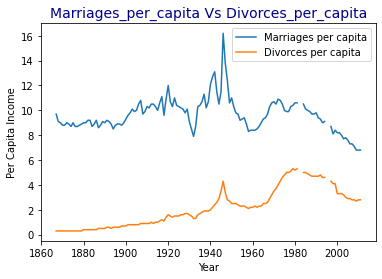

In [122]:
# Plot marriages per capita
plt.plot(df6['Year'], df6['Marriages_per_1000'], label='Marriages per capita')

# Plot divorces per capita
plt.plot(df6['Year'], df6['Divorces_per_1000'], label='Divorces per capita')

plt.title('Marriages_per_capita Vs Divorces_per_capita',color = 'Darkblue', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.legend()
plt.show()

# Question 7

In [69]:
df7 = pd.read_csv("us-marriages-divorces-1867-2014.csv")
df7

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


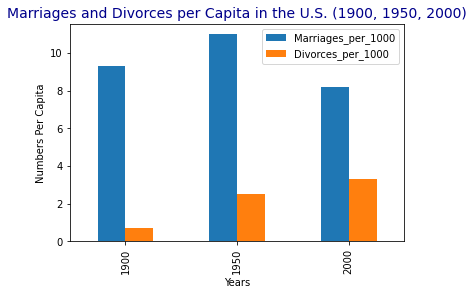

In [123]:
data = df7[(df7.Year == 1900) | (df7.Year == 1950) | (df7.Year == 2000)]
ax = data.plot.bar(x = 'Year', y = ['Marriages_per_1000', 'Divorces_per_1000'])
ax.set_ylabel("Numbers Per Capita")
ax.set_xlabel("Years")
plt.title("Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)",color = 'Darkblue', fontsize=14)
plt.show()

# Question 8

In [104]:
df8 = pd.read_csv("actor_kill_counts.csv")
df8 = df8.sort_values(by = "Count", ascending = True)
df8

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


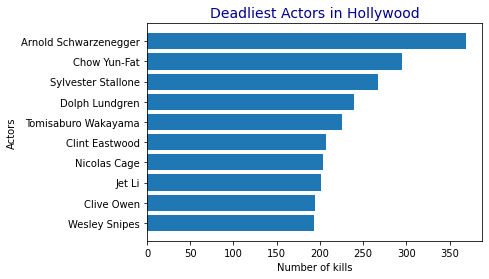

In [125]:
bars = plt.barh(df8['Actor'], df8['Count'])
plt.ylabel("Actors")
plt.xlabel("Number of kills")
plt.title("Deadliest Actors in Hollywood",color = 'Darkblue', fontsize=14)
plt.show()

# Question 9

In [74]:
df9 = pd.read_csv('roman-emperor-reigns.csv')
df9

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


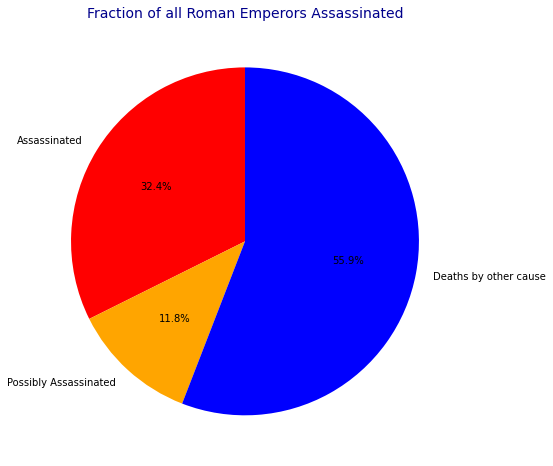

In [126]:
import matplotlib.pyplot as plt

# Assuming that assasinated and possibly assassinated are different categories
assassinated_count = df9['Cause_of_Death'].apply(lambda x: 'Assassinated' in x).sum()
Possibly_assass_count = df9['Cause_of_Death'].apply(lambda x: 'Possibly' in x).sum()
non_assassinated_count = len(df9) - assassinated_count- Possibly_assass_count

chart = plt.figure(figsize=(8, 8))
colors = ['red', 'orange', 'blue']

plt.pie([assassinated_count, Possibly_assass_count, non_assassinated_count],
        labels=['Assassinated', 'Possibly Assassinated', 'Deaths by other cause'],
        colors=colors, startangle=90, autopct='%1.1f%%')

# Add title
plt.title("Fraction of all Roman Emperors Assassinated",color = 'Darkblue', fontsize=14)
plt.show()

# Question 10

In [112]:
df10 = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
df10

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


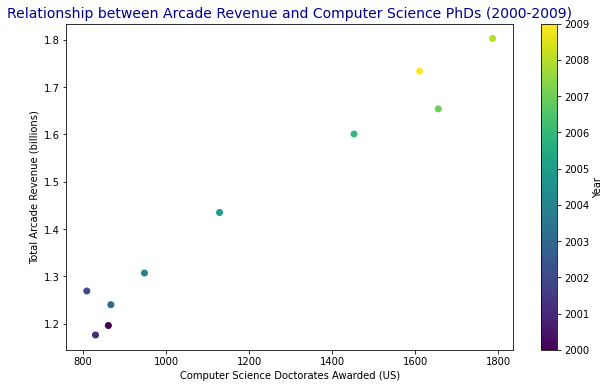

In [127]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with color-coded dots for each year
scatter=plt.scatter(df10['Computer Science Doctorates Awarded (US)'],df10['Total Arcade Revenue (billions)'],c=df10['Year'],
            cmap='viridis')

plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)',color = 'Darkblue', fontsize=14)

# # Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Show the plot
plt.show()